## Topic: Predicting Loan Default Risk 

In [2]:
# Import the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Demographics Dataset

In [4]:
# loading the dataset
url = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv"

In [5]:
df1 = pd.read_csv(url)

In [6]:
df1.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [7]:
df1.shape

(4346, 9)

In [8]:
# To check for duplicates
df1.duplicated().sum()

12

In [9]:
# To drop the duplicates
df1.drop_duplicates(inplace=True)

In [10]:
# To recheck the duplicates
df1.duplicated().sum()

0

In [11]:
# To check for the missimg values
df1.isna().sum().sort_values(ascending=False)/len(df1) * 100

bank_branch_clients           98.823258
level_of_education_clients    86.479003
employment_status_clients     14.951546
customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
dtype: float64

### Performance Dataset

In [13]:
# loading the dataset
url = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv"

In [14]:
df2 = pd.read_csv(url)

In [15]:
df2.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [16]:
df2.shape

(4368, 10)

In [17]:
# To check for duplicates
df2.duplicated().sum()

0

In [18]:
# To check for the missimg values
df2.isna().sum().sort_values(ascending=False)/len(df1) * 100

referredby       87.240425
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64

### Previous Datasets

In [20]:
url = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv"

In [21]:
df3 = pd.read_csv(url)

In [22]:
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [23]:
df3.shape

(18183, 12)

In [24]:
df3.isna().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [25]:
# referredby column needs to be dropped because of the hgh percentage of the missing values

df3.drop('referredby', axis=1, inplace=True)

In [26]:
# To check again
df3.isna().sum()

customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
closeddate         0
firstduedate       0
firstrepaiddate    0
dtype: int64

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   firstduedate     18183 non-null  object 
 10  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


In [28]:
# To check for duplicate
df3.duplicated().sum()

0

In [29]:
# Converting to datetime format
date_cols = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_cols:
    df3[col] = pd.to_datetime(df3[col])

In [30]:
df3.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
4896,8a858e645654fdc401565acc196e2946,301695304,2,2016-08-25 19:41:55,2016-08-25 18:41:49,10000.0,13000.0,30,2016-09-14 01:18:45,2016-09-26,2016-09-14 01:03:41
8269,8a858f725be8d4ff015bec5207ce5524,301917432,1,2017-05-24 17:02:51,2017-05-24 16:01:40,10000.0,13000.0,30,2017-06-23 12:04:46,2017-06-23,2017-06-23 11:54:37


In [31]:
# To extract the date from approveddate, creationdate, closeddate, firstduedate, firstrepaiddate features.

date_columns = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_columns:
    df3[col] = pd.to_datetime(df3[col]).dt.date

In [32]:
df3.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
10003,8a858fee5d1878f4015d187ebc4d0660,301967795,1,2017-07-07,2017-07-07,10000.0,11500.0,15,2017-07-07,2017-07-24,2017-07-07
3535,8a858f3d5add42e2015ae1a08bd806dc,301951890,6,2017-06-26,2017-06-26,25000.0,28750.0,30,2017-07-26,2017-07-26,2017-07-26


### NOTE: Previous dataset will not be merged with the other two datasets since it is not really relevant. but, it will be used for visualization in PowerBI. Therefore, Demographic and Performance datasets will be merged together which will be used for predicting loan default risk.

### Merging the Demographics and performance Datasets together

In [35]:
# Using left joining
merged_df = pd.merge(df2, df1, on='customerid', how='left')

In [36]:
merged_df.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4071,8a858fbd5cd6054a015ce4de9d8a4c5a,301982304,2,2017-07-17 16:45:04.000000,2017-07-17 15:44:57.000000,10000.0,11500.0,15,8a858ee65be8d42d015be94e806334fe,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,8a858e345be813ea015bea87369b2395,301988905,3,2017-07-21 09:25:31.000000,2017-07-21 08:25:25.000000,20000.0,24500.0,30,NaN,Good,1989-12-01 00:00:00.000000,Savings,3.425656,6.609444,GT Bank,NaN,Permanent,NaN


In [37]:
merged_df.shape

(4368, 18)

### Data Understanding

In [39]:
# To check for the structure and data types 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   referredby                  587 non-null    object 
 9   good_bad_flag               4368 non-null   object 
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

In [40]:
# To check for missing values

merged_df.isna().sum().sort_values(ascending=False)/len(df1) * 100

bank_branch_clients           100.023073
level_of_education_clients     90.562990
referredby                     87.240425
employment_status_clients      36.732810
birthdate                      25.357637
bank_name_clients              25.357637
latitude_gps                   25.357637
longitude_gps                  25.357637
bank_account_type              25.357637
customerid                      0.000000
systemloanid                    0.000000
termdays                        0.000000
totaldue                        0.000000
loanamount                      0.000000
creationdate                    0.000000
approveddate                    0.000000
loannumber                      0.000000
good_bad_flag                   0.000000
dtype: float64

#### Observations: The bank_branch_clients, level_of_education_clients and referredby columns have high percentage of missing values. Therefore, they need to be dropped. The categorical columns will be filled with unknown, while the numerical columns will be filled with either mean or median.

In [42]:
merged_df.drop(['bank_branch_clients', 'level_of_education_clients', 'referredby'], axis=1, inplace=True)

In [43]:
merged_df.shape

(4368, 15)

In [44]:
# To check for duplicates
merged_df.duplicated().sum()

0

In [45]:
# Summary statistics
merged_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000,3269.000000,3269.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676,4.530975,7.290383
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519,7.925454,3.269601
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,3.354842,6.473645
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.584222,6.625681
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.439855,7.426745
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


### Data Cleaning

In [47]:
# To fill the categorical columns with unknown

for col in ['employment_status_clients', 'bank_account_type',  'bank_name_clients']:
    merged_df[col].fillna('Unknown', inplace=True)

In [48]:
merged_df.isna().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type               0
longitude_gps                1099
latitude_gps                 1099
bank_name_clients               0
employment_status_clients       0
dtype: int64

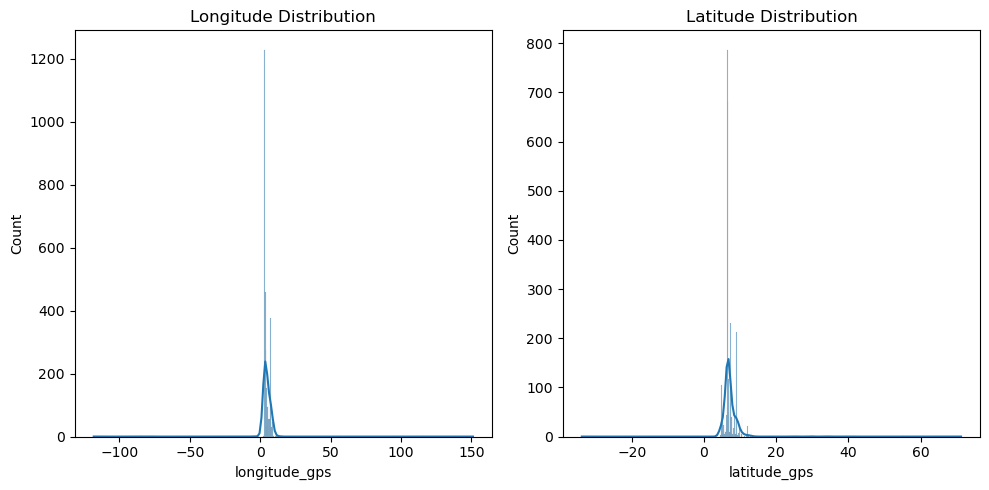

In [49]:
# To check whether to fill the numerical values with mean or median

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_df['longitude_gps'], kde=True)
plt.title('Longitude Distribution')

plt.subplot(1, 2, 2)
sns.histplot(merged_df['latitude_gps'], kde=True)
plt.title('Latitude Distribution')

plt.tight_layout()
plt.show()


In [50]:
# To fill the missing values with median since, they are skewed

merged_df['longitude_gps'].fillna(merged_df['longitude_gps'].median(), inplace=True)
merged_df['latitude_gps'].fillna(merged_df['latitude_gps'].median(), inplace=True)

In [51]:
merged_df.isna().sum().sort_values(ascending=False)

birthdate                    1099
customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
bank_account_type               0
longitude_gps                   0
latitude_gps                    0
bank_name_clients               0
employment_status_clients       0
dtype: int64

In [52]:
# Converting the date columns to datetime format
date_cols = ['approveddate', 'creationdate', 'birthdate']
for col in date_cols:
    merged_df[col] = pd.to_datetime(merged_df[col])

In [53]:
merged_df.sample(2)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
2189,8a858f7057b918e40157d465d8725583,301962519,9,2017-07-04 06:48:34,2017-07-04 05:48:28,40000.0,48000.0,60,Bad,1990-02-15,Other,3.565612,6.466717,GT Bank,Permanent
3535,8a858fae5921beeb01594a6b98513a8c,301962637,6,2017-07-04 08:25:52,2017-07-04 07:25:45,30000.0,34500.0,30,Good,1982-03-08,Savings,5.710499,5.588188,UBA,Permanent


In [54]:
# To standardized the column names

merged_df = merged_df.rename(columns={
    'customerid': 'customer_id',
    'systemloanid' : 'system_loan_id',
    'loannumber' : 'loan_number',
    'approveddate': 'approved_date',
    'creationdate': 'creation_date',
    'loanamount': 'loan_amount',
    'totaldue': 'total_due',
    'termdays': 'term_days',
})

In [55]:
merged_df.sample(2)

,customer_id,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
3383,8a858f375b493337015b551f74831441,301965255,3,2017-07-05 17:32:41,2017-07-05 16:32:35,10000.0,13000.0,30,Good,1993-06-30,Savings,3.573519,6.473645,Fidelity Bank,Unknown
863,8a858e6b5d1885ce015d1888318b0258,301999840,2,2017-07-28 05:48:27,2017-07-28 04:48:22,10000.0,11500.0,15,Bad,1988-11-09,Savings,4.619520,8.472312,GT Bank,Permanent


### Feature Engineering

In [57]:
merged_df.columns

Index(['customer_id', 'system_loan_id', 'loan_number', 'approved_date',
       'creation_date', 'loan_amount', 'total_due', 'term_days',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients'],
      dtype='object')

In [58]:
# Creating a new feature from birthdate, named 'age'

import datetime

merged_df['age'] = (datetime.datetime.now() - merged_df['birthdate']).dt.days / 365.25

# Handle missing values
merged_df['age'] = merged_df['age'].fillna(merged_df['age'].median())  # Replace NaN with median

# Convert to integer
merged_df['age'] = merged_df['age'].round().astype(int)

In [59]:
merged_df.sample(2)

,customer_id,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,age
2542,8a85896653e196390153e1fc6af61411,301960842,3,2017-07-03 11:07:27,2017-07-03 10:07:22,10000.0,13000.0,30,Bad,1982-03-16,Other,6.646197,7.816812,GT Bank,Permanent,43
3072,8a858f30551130db015512599f923f5a,301974059,8,2017-07-12 07:06:49,2017-07-12 06:06:42,10000.0,11500.0,15,Good,1981-10-04,Other,3.251920,6.694722,Zenith Bank,Permanent,44


In [60]:
merged_df.shape

(4368, 16)

In [61]:
# To drop the unnecessary column

merged_df.drop(columns=['birthdate'], inplace=True)

In [62]:
merged_df.isna().sum()

customer_id                  0
system_loan_id               0
loan_number                  0
approved_date                0
creation_date                0
loan_amount                  0
total_due                    0
term_days                    0
good_bad_flag                0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
age                          0
dtype: int64

In [63]:
# To extract the date from approveddate and creationdate features.

date_columns = ['approved_date', 'creation_date']
for col in date_columns:
    merged_df[col] = pd.to_datetime(merged_df[col]).dt.date

In [64]:
merged_df.head(2)

,customer_id,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,54
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,Good,Savings,3.885298,7.320700,GT Bank,Permanent,40


In [65]:
merged_df.shape

(4368, 15)

#### creating age group using binning

In [67]:
# for age category

merged_df['age_category'] = pd.cut(merged_df['age'], bins=[0, 18, 38, 48, 58, 68])
labels = ['Teens', 'Youth', 'Young Youth', 'Adult', 'Mid_Age', 'Aged']

In [68]:
merged_df['age'].max()

64

#### Creating interest

In [70]:
# Higher interest may increase the likelihood of default.

merged_df['interest'] = merged_df['total_due'] - merged_df['loan_amount']

#### Creating employment_risk

In [72]:
# Creating  feature that categorizes employment_status_clients into high risk, medium risk and low risk groups

employment_risk_map = {
    'Student': 'High Risk',
    'Unemployed': 'High Risk',
    'Contract': 'Medium Risk',
    'Self-Employed': 'Medium Risk',
    'Permanent': 'Low Risk',
    'Retired': 'Low Risk - Retired'
}

merged_df['employment_risk'] = merged_df['employment_status_clients'].map(employment_risk_map).fillna('Unknown')

In [73]:
# To check for the datatypes
merged_df.dtypes

customer_id                    object
system_loan_id                  int64
loan_number                     int64
approved_date                  object
creation_date                  object
loan_amount                   float64
total_due                     float64
term_days                       int64
good_bad_flag                  object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
employment_status_clients      object
age                             int32
age_category                 category
interest                      float64
employment_risk                object
dtype: object

In [74]:
# To change the datatypes of approved_date and creation_date to datetime
merged_df['approved_date'] = pd.to_datetime(merged_df['approved_date'])
merged_df['creation_date'] = pd.to_datetime(merged_df['creation_date'])

In [75]:
# To check for the datatypes
merged_df.dtypes

customer_id                          object
system_loan_id                        int64
loan_number                           int64
approved_date                datetime64[ns]
creation_date                datetime64[ns]
loan_amount                         float64
total_due                           float64
term_days                             int64
good_bad_flag                        object
bank_account_type                    object
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                    object
employment_status_clients            object
age                                   int32
age_category                       category
interest                            float64
employment_risk                      object
dtype: object

In [76]:
merged_df.sample(2)

,customer_id,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,age,age_category,interest,employment_risk
532,8a85882653e2eb990153e7a9eda325a7,301996404,5,2017-07-26,2017-07-26,10000.0,11125.0,15,Good,Other,6.765435,6.112582,Diamond Bank,Permanent,34,"(18, 38]",1125.0,Low Risk
1637,8a858f2756cec0a30156db8888e92b10,301975465,16,2017-07-13,2017-07-13,15000.0,15750.0,30,Good,Other,3.365071,6.532870,GT Bank,Permanent,39,"(38, 48]",750.0,Low Risk


In [77]:
# To check for descriptive statistics
merged_df.describe().round(2)

,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,longitude_gps,latitude_gps,age,interest
count,4.368000e+03,4368.00,4368,4368,4368.00,4368.00,4368.00,4368.00,4368.00,4368.00,4368.00
mean,3.019810e+08,5.17,2017-07-15 18:07:15.164835072,2017-07-15 17:51:05.934065920,17809.07,21257.38,29.26,4.29,7.12,40.79,3448.31
min,3.019585e+08,2.00,2017-07-01 00:00:00,2017-07-01 00:00:00,10000.00,10000.00,15.00,-118.25,-33.87,29.00,0.00
25%,3.019691e+08,2.00,2017-07-08 00:00:00,2017-07-08 00:00:00,10000.00,13000.00,30.00,3.38,6.53,38.00,3000.00
50%,3.019801e+08,4.00,2017-07-16 00:00:00,2017-07-16 00:00:00,10000.00,13000.00,30.00,3.58,6.63,40.00,3000.00
75%,3.019935e+08,7.00,2017-07-24 00:00:00,2017-07-24 00:00:00,20000.00,24500.00,30.00,4.84,7.18,43.00,4500.00
max,3.020040e+08,27.00,2017-07-30 00:00:00,2017-07-30 00:00:00,60000.00,68100.00,90.00,151.21,71.23,64.00,9000.00
std,1.343115e+04,3.65,NaN,NaN,10749.69,11943.51,11.51,6.87,2.84,5.33,1692.69


In [78]:
merged_df.columns

Index(['customer_id', 'system_loan_id', 'loan_number', 'approved_date',
       'creation_date', 'loan_amount', 'total_due', 'term_days',
       'good_bad_flag', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'age', 'age_category',
       'interest', 'employment_risk'],
      dtype='object')

In [79]:
merged_df.shape

(4368, 18)

### Data Exploration

In [81]:
# The target column
merged_df.good_bad_flag.value_counts()

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

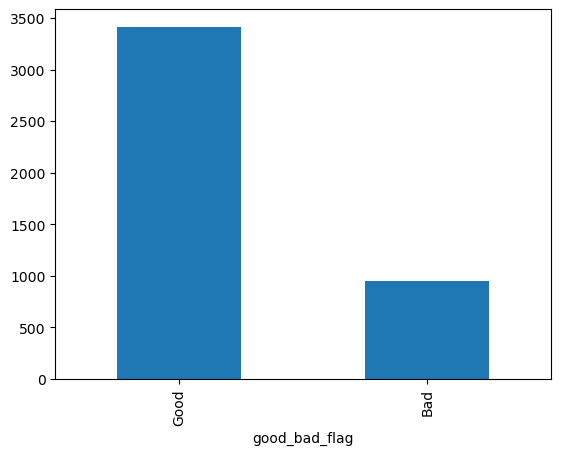

In [82]:
merged_df.good_bad_flag.value_counts().plot(kind='bar')

In [83]:
#To convert the target column to numerical

merged_df['good_bad_flag'] = merged_df['good_bad_flag'].map({'Good': 1, 'Bad': 0})

In [84]:
merged_df['good_bad_flag'].unique()

array([1, 0], dtype=int64)

In [85]:
merged_df.head()

,customer_id,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,age,age_category,interest,employment_risk
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,1,Other,3.432010,6.433055,Diamond Bank,Permanent,54,"(48, 58]",4500.0,Low Risk
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,1,Savings,3.885298,7.320700,GT Bank,Permanent,40,"(38, 48]",2250.0,Low Risk
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,1,Other,11.139350,10.292041,EcoBank,Permanent,41,"(38, 48]",2250.0,Low Risk
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,1,Savings,3.985770,7.491708,First Bank,Permanent,48,"(38, 48]",1500.0,Low Risk
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,1,Other,7.457913,9.076574,GT Bank,Permanent,39,"(38, 48]",4000.0,Low Risk


### Observation: The target column is imbalanced which needs to be treated using smote method.

### Features Selection

In [88]:
merged_df.columns

Index(['customer_id', 'system_loan_id', 'loan_number', 'approved_date',
       'creation_date', 'loan_amount', 'total_due', 'term_days',
       'good_bad_flag', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'age', 'age_category',
       'interest', 'employment_risk'],
      dtype='object')

#### 1. FEATURE IMPORTANCE FROM RANDOM FOREST

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
df = pd.read_csv('loan_default_risk.csv')

# Define x and y
x = df.drop(['customer_id', 'system_loan_id', 'loan_number', 'approved_date', 'creation_date', 'good_bad_flag', 'age'], axis=1)
y = df['good_bad_flag']

# One-hot encoding for categorical variables
categorical_cols = ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'age_category', 'employment_risk']
x = pd.get_dummies(x, columns=categorical_cols)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

# Permutation Importance
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_
importances_merged_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
importances_merged_df = importances_merged_df.sort_values(by='importance', ascending=False)
print(importances_merged_df)

                                    feature  importance
4                              latitude_gps    0.305349
3                             longitude_gps    0.296965
1                                 total_due    0.043954
5                                  interest    0.037650
0                               loan_amount    0.028088
16                bank_name_clients_GT Bank    0.023784
36                    age_category_(18, 38]    0.018729
37                    age_category_(38, 48]    0.017733
15             bank_name_clients_First Bank    0.016899
2                                 term_days    0.015953
10            bank_name_clients_Access Bank    0.015039
23                    bank_name_clients_UBA    0.013741
28            bank_name_clients_Zenith Bank    0.013659
38                    age_category_(48, 58]    0.012858
8                 bank_account_type_Savings    0.010546
13                   bank_name_clients_FCMB    0.010260
11           bank_name_clients_Diamond Bank    0

### Observation: The feature importance scores suggest that geographical location, debt amount, interest, and loan amount are the most important factors in predicting loan default risk. Bank-related features, age, and employment-related features are also relevant, but less important. These insights can be used to inform lending decisions and risk management strategies.

#### 2. Using Correlation Matrix

In [93]:
# dropping some columns
x = df.drop(['good_bad_flag', 'customer_id', 'system_loan_id', 'loan_number'], axis=1)
y = df['good_bad_flag']

# One-hot encoding for categorical variables
categorical_cols = ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'age_category', 'employment_risk']
x = pd.get_dummies(x, columns=categorical_cols)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

# Correlation Analysis
num_cols = ['loan_amount', 'total_due', 'term_days', 'interest', 'longitude_gps', 'latitude_gps']
corr_with_target = x_train[num_cols].corrwith(y_train.astype('category').cat.codes)
print(corr_with_target)

# Alternatively, you can use the following code
numerical_df = df[['loan_amount', 'total_due', 'term_days', 'interest', 'good_bad_flag']]
numerical_df['good_bad_flag'] = numerical_df['good_bad_flag'].astype('category').cat.codes
corr_matrix = numerical_df.corr()
print(corr_matrix['good_bad_flag'].sort_values(ascending=False))

loan_amount      0.111920
total_due        0.105500
term_days        0.007063
interest         0.033650
longitude_gps   -0.005119
latitude_gps    -0.033384
dtype: float64
good_bad_flag    1.000000
loan_amount      0.115267
total_due        0.108357
interest         0.032540
term_days        0.005160
Name: good_bad_flag, dtype: float64


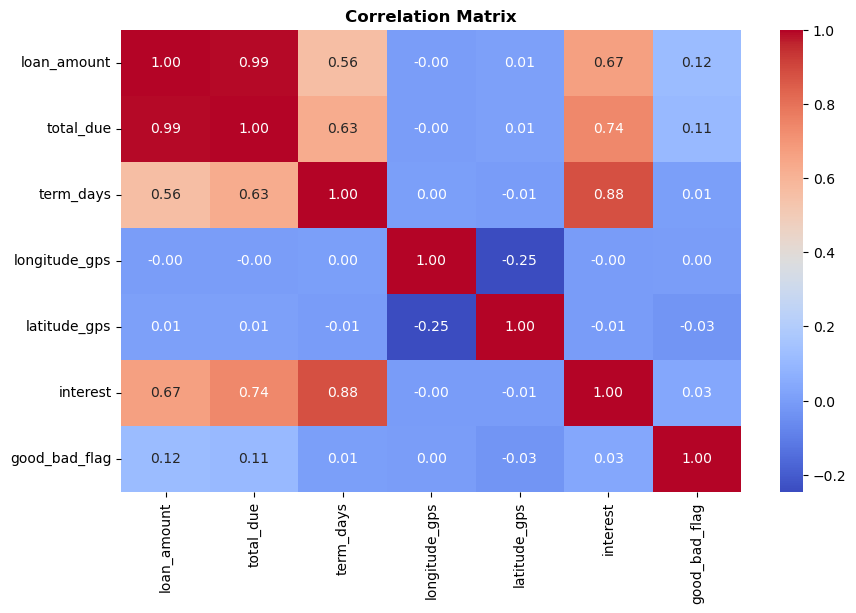

In [94]:
num_cols = ['loan_amount', 'total_due', 'term_days', 'longitude_gps', 'latitude_gps', 'interest', 'good_bad_flag']

plt.figure(figsize=(10, 6))

# Compute correlation matrix
heatmap = merged_df[num_cols].corr()

# Plot heatmap correctly
sns.heatmap(data=heatmap, fmt='.2f', annot=True, cmap='coolwarm')

plt.title('Correlation Matrix', fontweight='bold')
plt.show()

### Observations:

### loan_amount: 0.12 which is positive correlation, indicating that higher loan amounts might be associated with a higher likelihood of default. total_due: 0.11 which is also positive correlation, indicating that higher total due amounts might be associated with a higher likelihood of default. interest: 0.03 indicating that higher interest might be associated with a higher likelihood of default. term_days: 0.01 (very low positive correlation, indicating that term days might not be a strong predictor of default). longitude_gps: -0.005 (very low negative correlation, indicating that longitude might not be a strong predictor of default). latitude_gps: -0.03 (low negative correlation, indicating that latitude might have some association with default, but it's not strong) 

### These correlations suggest that the loan amount and total due amount are the most strongly associated with the likelihood of default. 

### Data Preparation

In [97]:
merged_df.columns

Index(['customer_id', 'system_loan_id', 'loan_number', 'approved_date',
       'creation_date', 'loan_amount', 'total_due', 'term_days',
       'good_bad_flag', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'age', 'age_category',
       'interest', 'employment_risk'],
      dtype='object')

In [98]:
# Dropping some specified columns
x = merged_df.drop(columns=['customer_id', 'loan_number', 'system_loan_id', 'approved_date', 'creation_date', 'age', 'good_bad_flag'], axis=1)

# Target variable (y)
y = merged_df['good_bad_flag']

In [99]:
x.columns

Index(['loan_amount', 'total_due', 'term_days', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'employment_status_clients', 'age_category', 'interest',
       'employment_risk'],
      dtype='object')

In [100]:
x.shape

(4368, 11)

In [101]:
# split into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [102]:
x_train.shape, x_test.shape

((3931, 11), (437, 11))

### Data Preprocessing / EDA

In [104]:
# Separte the categoricl and numerical columns
# for the num column
num_cols = x.select_dtypes(include=['int64', 'float']).columns.tolist()
# for cat column
cat_cols = x.select_dtypes(include=['object', 'category']).columns.tolist()

In [105]:
num_cols

['loan_amount',
 'total_due',
 'term_days',
 'longitude_gps',
 'latitude_gps',
 'interest']

In [106]:
cat_cols

['bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'age_category',
 'employment_risk']

#### EDA for numerical columns

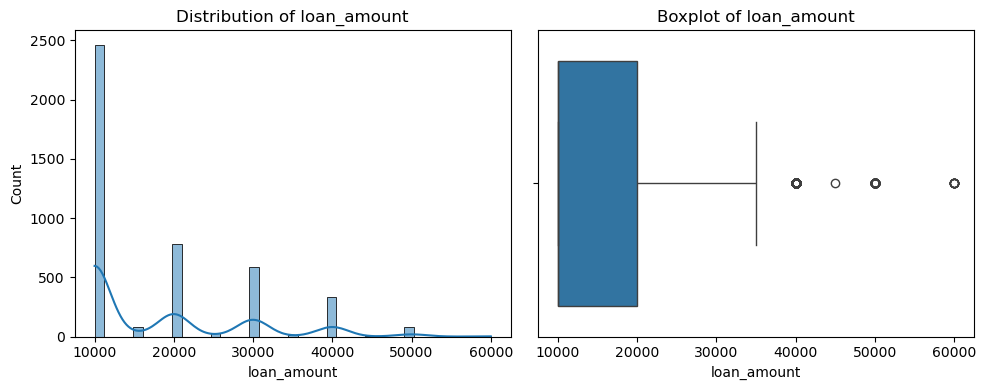

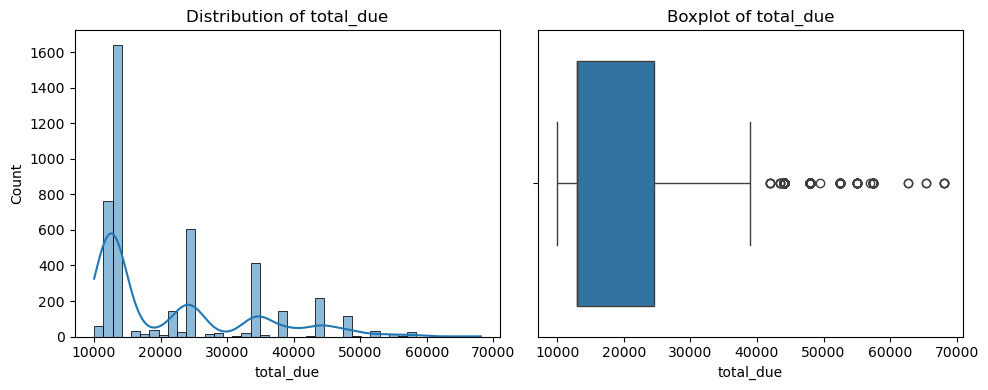

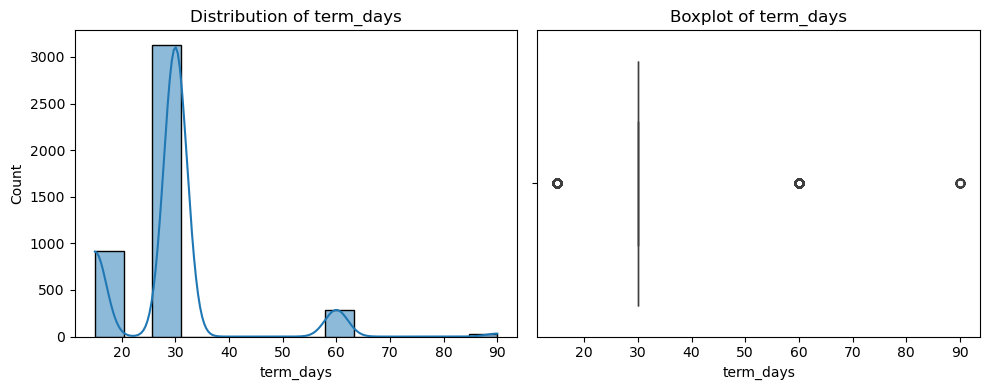

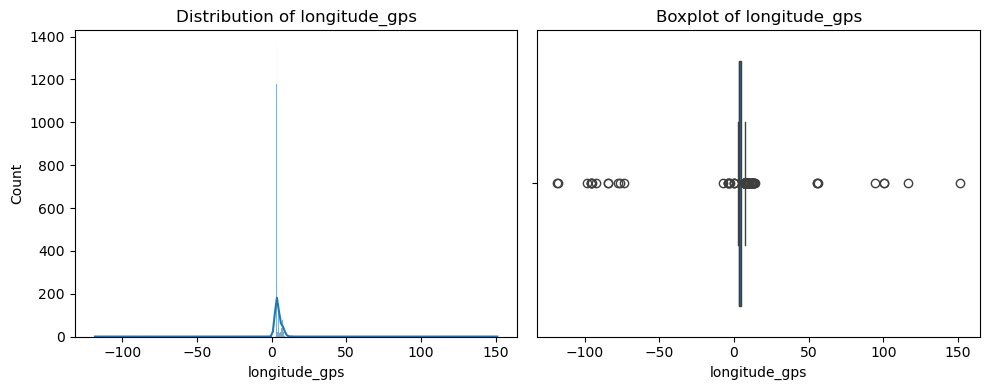

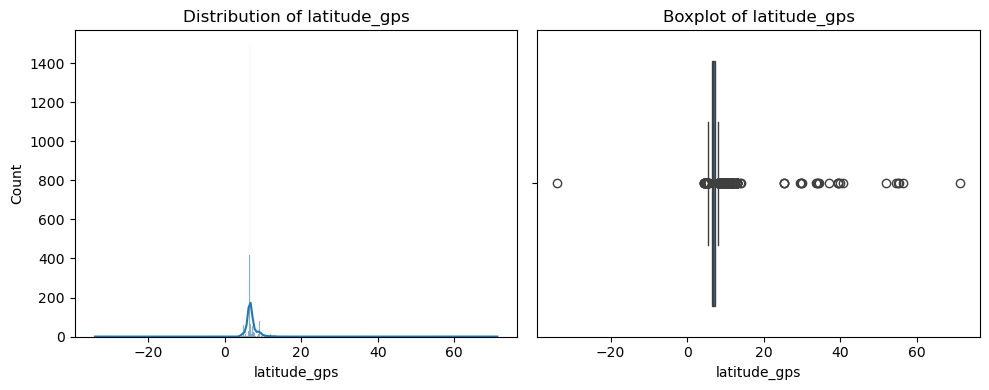

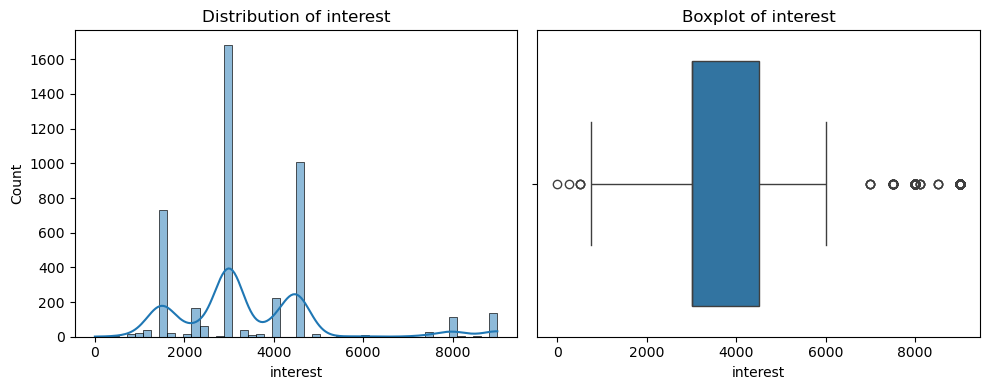

In [108]:
for col in num_cols: 
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### The numerical columns were observed with skewness and outliers which will be treated using log transformation.

#### EDA for categorical columns

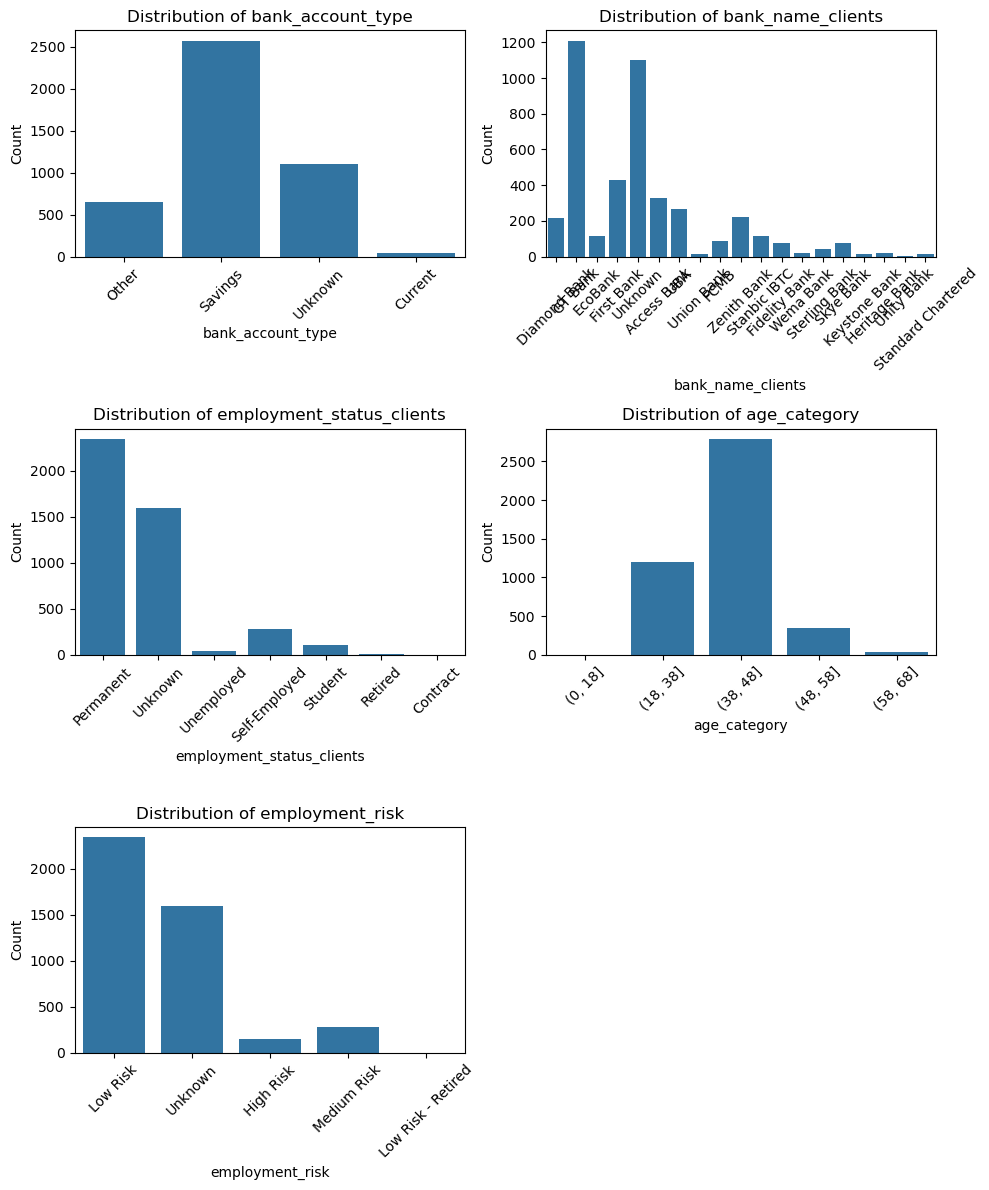

In [111]:
# Define categorical columns
cat_cols = ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'age_category', 'employment_risk']

# Calculate the number of rows and columns needed
n_plots = len(cat_cols)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

# Iterate over categorical columns
for i, col in enumerate(cat_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.countplot(ax=ax, data=merged_df, x=col)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for i in range(len(cat_cols), n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

### Observations: The bank account type with the highest loan amount collected happens to be savings while the lowest account type is current. The employment status clients with the highest sum of loan amount collected is permanent while the lowest is contract. The age group of 38-48 collected the highest loan amount. The bank name clients with the highest loan collected is GTBank while the bank with the lowest loan collected is Unity bank.

#### # To calulate the skewness

In [114]:
skewness = merged_df[num_cols].skew().sort_values(ascending=False)

In [115]:
skewness

latitude_gps     10.823360
term_days         1.932360
interest          1.473551
loan_amount       1.250938
total_due         1.165669
longitude_gps    -3.583262
dtype: float64

In [116]:
# To deal with it
# Detect outliers using IQR

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [117]:
# To deal with outliers
# asset, price and debt are very skewed(using cap)

for col in ['loan_amount', 'total_due', 'term_days', 'longitude_gps', 'latitude_gps', 'interest']:
    # Calculate the 95th percentile (upper cap)
    upper = merged_df[col].quantile(0.95)
    
    # Apply winsorization by capping the values at the 95th percentile
    capped = merged_df[col].clip(upper=upper)
    
    # Apply logarithmic transformation after capping
    merged_df[f'{col}_log'] = np.log1p(capped)

In [118]:
merged_df.head()

,customer_id,system_loan_id,loan_number,approved_date,creation_date,loan_amount,total_due,term_days,good_bad_flag,bank_account_type,...,age,age_category,interest,employment_risk,loan_amount_log,total_due_log,term_days_log,longitude_gps_log,latitude_gps_log,interest_log
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25,2017-07-25,30000.0,34500.0,30,1,Other,...,54,"(48, 58]",4500.0,Low Risk,10.308986,10.448744,3.433987,1.488853,2.005937,8.412055
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05,2017-07-05,15000.0,17250.0,30,1,Savings,...,40,"(38, 48]",2250.0,Low Risk,9.615872,9.755625,3.433987,1.586230,2.118746,7.719130
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06,2017-07-06,20000.0,22250.0,15,1,Other,...,41,"(38, 48]",2250.0,Low Risk,9.903538,10.010142,2.772589,2.147387,2.314957,7.719130
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27,2017-07-27,10000.0,11500.0,15,1,Savings,...,48,"(38, 48]",1500.0,Low Risk,9.210440,9.350189,2.772589,1.606588,2.139090,7.313887
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03,2017-07-03,40000.0,44000.0,30,1,Other,...,39,"(38, 48]",4000.0,Low Risk,10.596660,10.691968,3.433987,2.135102,2.310213,8.294300


In [119]:
merged_df.columns

Index(['customer_id', 'system_loan_id', 'loan_number', 'approved_date',
       'creation_date', 'loan_amount', 'total_due', 'term_days',
       'good_bad_flag', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'age', 'age_category',
       'interest', 'employment_risk', 'loan_amount_log', 'total_due_log',
       'term_days_log', 'longitude_gps_log', 'latitude_gps_log',
       'interest_log'],
      dtype='object')

In [120]:
merged_df.shape

(4368, 24)

### Data Preparation

In [122]:
# Dropping specified columns from the dataframe to create features (x)
x = merged_df.drop(columns=['customer_id', 'system_loan_id', 'loan_number', 'approved_date',  'longitude_gps', 'latitude_gps', 'creation_date', 'good_bad_flag', 'loan_amount', 'total_due', 'term_days', 'interest','age'], axis=1)

# Target variable (y)
y = merged_df['good_bad_flag']

In [123]:
x.columns

Index(['bank_account_type', 'bank_name_clients', 'employment_status_clients',
       'age_category', 'employment_risk', 'loan_amount_log', 'total_due_log',
       'term_days_log', 'longitude_gps_log', 'latitude_gps_log',
       'interest_log'],
      dtype='object')

In [124]:
x.sample(2)

,bank_account_type,bank_name_clients,employment_status_clients,age_category,employment_risk,loan_amount_log,total_due_log,term_days_log,longitude_gps_log,latitude_gps_log,interest_log
1058,Other,First Bank,Permanent,"(38, 48]",Low Risk,10.59666,10.691968,4.110874,1.437570,2.050504,8.987322
4157,Savings,Access Bank,Permanent,"(38, 48]",Low Risk,9.21044,9.472782,3.433987,2.147387,2.314957,8.006701


In [125]:
# split into train and test
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [127]:
x_train.shape, x_test.shape

((3931, 11), (437, 11))

### Data Preprocessing

In [129]:
# Separte the categoricl and numerical columns
# for the num column
num_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
# for cat column
cat_cols = x.select_dtypes(include=['object', 'category']).columns.tolist()

In [130]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bank_account_type          4368 non-null   object  
 1   bank_name_clients          4368 non-null   object  
 2   employment_status_clients  4368 non-null   object  
 3   age_category               4368 non-null   category
 4   employment_risk            4368 non-null   object  
 5   loan_amount_log            4368 non-null   float64 
 6   total_due_log              4368 non-null   float64 
 7   term_days_log              4368 non-null   float64 
 8   longitude_gps_log          4349 non-null   float64 
 9   latitude_gps_log           4367 non-null   float64 
 10  interest_log               4368 non-null   float64 
dtypes: category(1), float64(6), object(4)
memory usage: 345.9+ KB


In [131]:
num_cols

['loan_amount_log',
 'total_due_log',
 'term_days_log',
 'longitude_gps_log',
 'latitude_gps_log',
 'interest_log']

In [132]:
cat_cols

['bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'age_category',
 'employment_risk']

In [133]:
# for the cat column,one hot encoding is used to convert it to numerical since it is nominal category

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [134]:
encoder = OneHotEncoder(sparse_output=False).fit(merged_df[cat_cols])  

In [135]:
encoder

OneHotEncoder(sparse_output=False)

In [136]:
# to see the encoded columns
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [137]:
x_train[encoded_cols]= encoder.transform(x_train[cat_cols])
x_test[encoded_cols]= encoder.transform(x_test[cat_cols])

In [138]:
# for numerical columns, scaling is used

scaler = StandardScaler()

In [139]:
x_train[num_cols]= scaler.fit_transform(x_train[num_cols])
x_test[num_cols]= scaler.transform(x_test[num_cols])

In [140]:
# To combine together
train_processed = x_train[num_cols + encoded_cols]
test_processed = x_test[num_cols + encoded_cols]

In [141]:
train_processed 

,loan_amount_log,total_due_log,term_days_log,longitude_gps_log,latitude_gps_log,interest_log,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,bank_account_type_Unknown,...,employment_status_clients_Unknown,"age_category_(18, 38]","age_category_(38, 48]","age_category_(48, 58]","age_category_(58, 68]",employment_risk_High Risk,employment_risk_Low Risk,employment_risk_Low Risk - Retired,employment_risk_Medium Risk,employment_risk_Unknown
814,-0.808207,-0.720841,0.268654,1.008425,-1.472335,-0.044135,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
167,-0.808207,-0.720841,0.268654,1.946775,1.992116,-0.044135,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2430,1.883949,1.813370,0.268654,1.890396,1.985469,0.553973,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
326,-0.808207,-0.720841,0.268654,-0.702387,-0.353817,-0.044135,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1816,-0.808207,-0.720841,0.268654,0.936776,-0.483929,-0.044135,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.537847,0.596347,0.268654,0.755984,0.926695,0.798863,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1160,0.537847,0.596347,0.268654,1.946775,0.885844,0.798863,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1193,-0.808207,-0.720841,0.268654,0.695462,0.382993,-0.044135,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3527,0.537847,0.596347,0.268654,-0.881006,-0.376859,0.798863,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### TRAINING THE MODEL 

#### simple imputer is used in case there are missing values. Pipeline is used on logistic regression model.

In [144]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='median')
train_processed_imputed = imputer.fit_transform(train_processed)
model.fit(train_processed_imputed, y_train)

# Use a pipeline with imputation
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LogisticRegression())
])
pipeline.fit(train_processed, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('model', LogisticRegression())])

### Predict

In [146]:
# Make predictions on the test set
y_pred = pipeline.predict(test_processed)

### Evaluation

In [148]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.782608695652174
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.78      1.00      0.88       342

    accuracy                           0.78       437
   macro avg       0.39      0.50      0.44       437
weighted avg       0.61      0.78      0.69       437

Confusion Matrix:
[[  0  95]
 [  0 342]]


### Observations: The model has an accuracy of 78% with the precision, recall and f1-score of zero on class 0 and 78%, 100% and 88% on class 1 respectively. This suggests that the model is biased towards predicting class 1. The model's performance is not balanced between the two classes. It is favoring class 1 over class 0. This could be due to class imbalance.. To improve the model's performance, Handling class imbalance can be performed by oversampling the minority class to balance the class distribution using smote method.

### Treating Class Imbalanced

In [151]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Impute missing values
imputer = SimpleImputer(strategy='mean')
train_processed_imputed = imputer.fit_transform(train_processed)
test_processed_imputed = imputer.transform(test_processed)

# Apply SMOTE
smote = SMOTE(random_state=42)
train_processed_resampled, y_train_resampled = smote.fit_resample(train_processed_imputed, y_train)

# Train the model
model = LogisticRegression()
model.fit(train_processed_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(test_processed_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5949656750572082
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.66      0.42        95
           1       0.86      0.58      0.69       342

    accuracy                           0.59       437
   macro avg       0.58      0.62      0.55       437
weighted avg       0.74      0.59      0.63       437

Confusion Matrix:
[[ 63  32]
 [145 197]]


### Observation: After treating class imbalanced, the model has an accuracy reduced to 59%. This accuracy is relatively low, indicating that the model is not performing well. The confusion matrix shows that the model is predicting more False Negatives (147) than False Positives (32), indicating that it is more likely to miss positive cases than to incorrectly predict negative cases as positive. Several models will be used in order to know the model that performed well.

### Using Several Models


-------------------------------------------------- Random Forest --------------------------------------------------

Model: Random Forest
Accuracy: 0.6590389016018307
AUC Score: 0.5525084641428132
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.31      0.28        95
           1       0.80      0.76      0.78       342

    accuracy                           0.66       437
   macro avg       0.53      0.53      0.53       437
weighted avg       0.68      0.66      0.67       437

Confusion Matrix:
[[ 29  66]
 [ 83 259]]

-------------------------------------------------- Logistic Regression --------------------------------------------------

Model: Logistic Regression
Accuracy: 0.5949656750572082
AUC Score: 0.6775931055709449
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.66      0.42        95
           1       0.86      0.58      0.69       342

    accuracy  

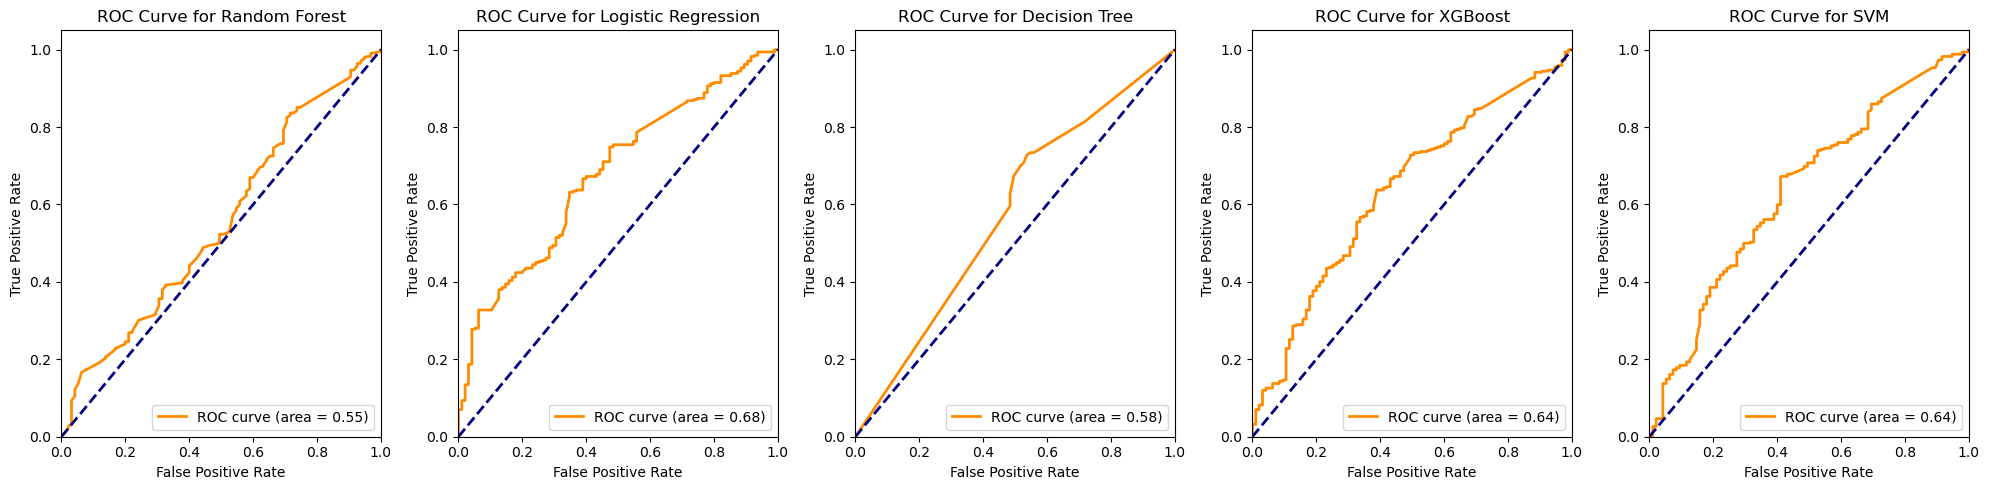

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True)
}

# Impute missing values
imputer = SimpleImputer(strategy='mean')
train_processed_imputed = imputer.fit_transform(train_processed)
test_processed_imputed = imputer.transform(test_processed)

# Apply SMOTE
smote = SMOTE(random_state=42)
train_processed_resampled, y_train_resampled = smote.fit_resample(train_processed_imputed, y_train)

# Train and evaluate models
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
for i, (name, model) in enumerate(models.items()):
    print(f"\n{'-'*50} {name} {'-'*50}\n")
    
    model.fit(train_processed_resampled, y_train_resampled)
    y_pred = model.predict(test_processed_imputed)
    y_pred_proba = model.predict_proba(test_processed_imputed)[:, 1]
    
 # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("AUC Score:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve for {name}')
    axes[i].legend(loc="lower right")

plt.tight_layout()
plt.show()

#### Observations: 

#### The XGBoost model performs the best, with an accuracy of 69% and an AUC score of 64%. The classification report shows that the model has a good balance between precision and recall for both classes. Random Forest model performs well, with an accuracy of 66% and an AUC score of 55%. This shows that the model has a slightly higher precision for class 1 (good loans) than class 0 (bad loans). Decision Tree performs with an accuracy of 65% and an AUC score of 58%. It shows that the model has a slightly higher recall for class 1 (good loans) than class 0 (bad loans). Logistic Regression performs relatively poorly, with an accuracy of 59% and an AUC score of 68% showing that the model has a high recall for class 0 (bad loans) but a lower precision. SVM performs relatively poorly, with an accuracy of 62% and an AUC score of 64% showing that the model has a good balance between precision and recall for both classes, but the accuracy is lower than XGBoost and Random Forest.

#### The XGBoost model performs the best in terms of accuracy and AUC score, suggesting that it is a good choice for predicting loan default risk followed by Random Forest. To get better result, hyperparameter tuning can be performed on the models.

### Hyperparameter Tuning

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Define preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [160]:
# Define hyperparameters
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs'],
        'classifier__max_iter': [500]
    }, 

'DecisionTree': {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 5]
},

    'RandomForest': {
        'classifier__n_estimators': [100, 300],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 4]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 300],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 6],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0]
    }
}
# Loop through and tune each model
for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessing', preprocessor),
        ('sampling', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    print(f"\nTuning {name}...")
    search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1_macro', n_jobs=-1)
    search.fit(x_train, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(x_test)

    print(f"\nBest Params for {name}: {search.best_params_}")
    print(classification_report(y_test, y_pred))



Tuning LogisticRegression...

Best Params for LogisticRegression: {'classifier__C': 0.01, 'classifier__max_iter': 500, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.31      0.65      0.42        95
           1       0.86      0.60      0.71       342

    accuracy                           0.61       437
   macro avg       0.59      0.63      0.57       437
weighted avg       0.74      0.61      0.65       437


Tuning DecisionTree...

Best Params for DecisionTree: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.30      0.52      0.38        95
           1       0.83      0.67      0.74       342

    accuracy                           0.64       437
   macro avg       0.57      0.59      0.56       437
weighted avg       0.72      0.64      0.66       437


Tuning R

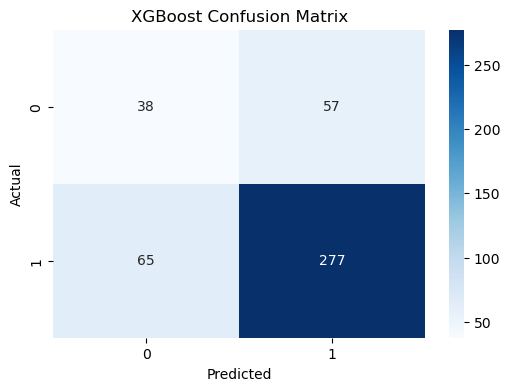

In [162]:
# --- Confusion Matrix for XGBoost ---
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

#### Observations: XGBoost model performs the best, with an accuracy of 72% and an F1-score of 82% for the positive class. This suggests that XGBoost is able to effectively capture the underlying patterns in the data and make accurate predictions. Random Forest performs well with an accuracy of 70%  and f1-score of 80% but not as well as XGBoost for the positive class. This suggests that Random Forest is also a strong model, but may not be as effective as XGBoost in this particular case. 
#### Based on these results, XGBoost happens to be the model that perform well.

#### THE BEST MODEL TO USE

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

final_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', final_model)
    ])

# Train the model
pipeline.fit(x_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test)

# Classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f'Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}, AUC={auc:.4f}')

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

Accuracy=0.7529, Precision=0.7868, Recall=0.9386, F1-score=0.8560, AUC=0.5999
[[  8  87]
 [ 21 321]]


## In overall, XGBoost happens to be the best model with the accuracy of 75%.

### Using pipeline with the best model(Xgboost)

In [173]:
import joblib

In [175]:
final_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])

In [177]:
final_model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amount_log',
                                                   'total_due_log',
                                                   'term_days_log',
                                                   'longitude_gps_log',
                                                   'latitude_gps_log',
                                                   'interest_log']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encod...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### # To save the model

In [182]:
import joblib
joblib.dump(final_model, "loan_default_risk_predictor.pkl")

['loan_default_risk_predictor.pkl']